<a href="https://colab.research.google.com/github/Satyam-kumar-yadav/t-SNE-and-KMeans/blob/main/t_SNE_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  In this I have used mnist dataset which is supervised learning problem but I have coverted it to unsupervised problem by using t-SNE.

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [114]:
#### Loading our dataset
data = datasets.fetch_openml(
 'mnist_784',
 version=1,
 return_X_y=True
)
### Unpacking the data
pixel_values, targets = data
targets = targets.astype(int)

In [115]:
pixel_values.shape

(70000, 784)

In [128]:
first_image = pixel_values[0].reshape(28,28)
first_image.shape

(28, 28)

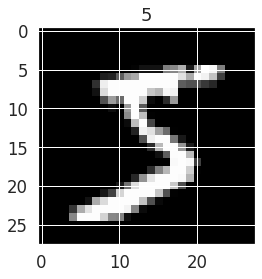

In [129]:
plt.imshow(first_image, cmap='gray')
plt.title(targets[0])
plt.show()

In [130]:
#### Using t-SNE for reducing the dimension of data and generating two componenets from it
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [131]:
transformed_data ### transforming components and can be transformed into more components

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

In [121]:
### Dataset for kMeans clustring
cluster_df = pd.DataFrame({
    'x' : transformed_data[:,0],
    'y' : transformed_data[:,1],
    'target' : targets[:1000]
})
cluster_df.head(5)

,x,y,target
0,-15.668859,-13.853779,5
1,-14.389568,-51.056541,0
2,-17.825314,35.448936,4
3,22.555698,9.680719,1
4,1.181254,29.461842,9


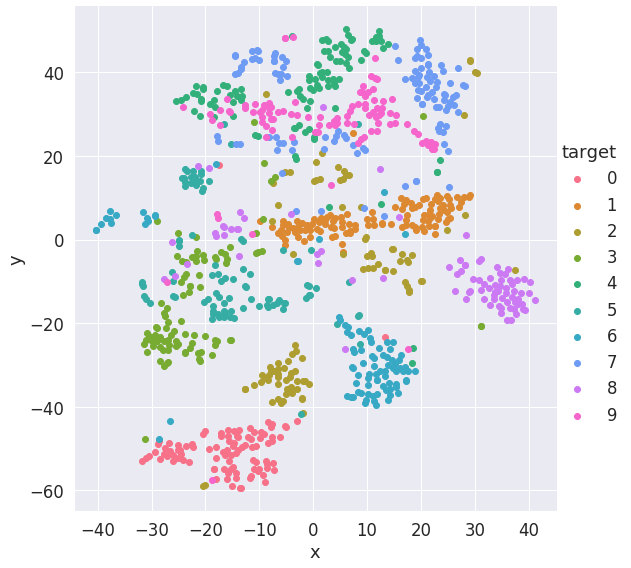

In [127]:
import seaborn as sns
grid = sns.FacetGrid(cluster_df, hue="target", height=8)
grid.map(plt.scatter, "x", "y").add_legend()
plt.show()

**Now applying Kmeans Clustering to the cluster_df**

In [123]:
from scipy.spatial import distance ## calculating distance between data points

In [139]:
def kmeans(X,k=10,max_iterations=200):
    '''
    X: data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy array
    2. Pick index of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    idx = np.random.choice(len(X), k, replace=False) ### random 10 value
    centroids = X[idx, :] ### random 10 centroids
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1) ## choosing min value index as a part of cluster
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)]) 
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

In [140]:
multi_data = cluster_df.drop('target',axis=1) ### droping the target
multi_data = multi_data.values
P = kmeans(multi_data) ### applying on the multi_data dataframe

**Lets Visualize the cluster on the basis of color and size**

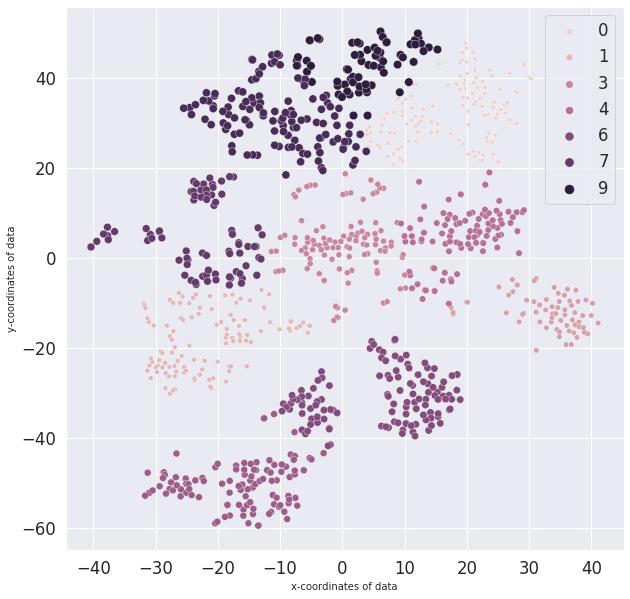

In [141]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = multi_data[:,0],y=multi_data[:,1],hue=P,size=P)
plt.xlabel('x-coordinates of data',fontsize = 10)
plt.ylabel('y-coordinates of data',fontsize = 10)
plt.show()

  **Observations :-** 

1- Our kmeans clustering perform pretty much well on the data.<br>
2- We were able to classify digits on the basis of pixel value for each digits.<br>
3- On comparing it with first plot it resemble as much as same.
